In [1]:
# Restart the runtime using the following code snippet:
# import os
# os.kill(os.getpid(), 9)

In [2]:
# !pip install tensorflow==2.12.0 # This will install version 2.12.0

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [13]:
# Step 1: Load VGG16 base model (without top layers)
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False  # Freeze convolutional layers

In [14]:
# # Step 2: Build custom classification layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='sigmoid')  # 2 classes: cat and dog
])

In [15]:
# Step 3: Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
# Step 4: Prepare data generators with augmentation
from tensorflow.keras.applications.vgg16 import preprocess_input
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [8]:
#train---cat
#    !---dog
#validation---cat
#         !---dog

In [8]:
#training on the original dataset of cat vs dog was too big ,
#it was taking mutiple hours to train the model ,
# hence i have reduce the dataset to only few hundred images

!unzip /content/data_1.zip -d /content/data_1

Archive:  /content/data_1.zip
   creating: /content/data_1/data - Copy/
   creating: /content/data_1/data - Copy/train/
   creating: /content/data_1/data - Copy/train/cat/
  inflating: /content/data_1/data - Copy/train/cat/cat.12400.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12401.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12402.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12403.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12404.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12405.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12406.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12407.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12408.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12409.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12410.jpg  
  inflating: /content/data_1/data - Copy/train/cat/cat.12411.jpg  
  inflating: /content/da

In [19]:
# Building model
train_generator = train_datagen.flow_from_directory(
    '/content/data_1/data - Copy/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 200 images belonging to 2 classes.


In [20]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/data_1/data - Copy/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 50 images belonging to 2 classes.


In [21]:
# Step 5: Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

Epoch 1/10
7/7 [==============================] - 64s 9s/step - loss: 8.3788 - accuracy: 0.7700 - val_loss: 5.0027 - val_accuracy: 0.8800
Epoch 2/10
7/7 [==============================] - 60s 9s/step - loss: 6.4421 - accuracy: 0.8950 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 61s 9s/step - loss: 9.0411 - accuracy: 0.9150 - val_loss: 3.5116 - val_accuracy: 0.9600
Epoch 4/10
7/7 [==============================] - 73s 10s/step - loss: 10.4955 - accuracy: 0.9150 - val_loss: 14.2230 - val_accuracy: 0.8800
Epoch 5/10
7/7 [==============================] - 70s 10s/step - loss: 5.1651 - accuracy: 0.9350 - val_loss: 0.7898 - val_accuracy: 0.9800
Epoch 6/10
7/7 [==============================] - 70s 10s/step - loss: 7.5249 - accuracy: 0.9300 - val_loss: 0.9745 - val_accuracy: 0.9800
Epoch 7/10
7/7 [==============================] - 64s 9s/step - loss: 5.5239 - accuracy: 0.9400 - val_loss: 13.3867 - val_accuracy: 0.8600
Epoch 8/10
7/7 [========

In [22]:
!unzip /content/test_1.zip -d /content/test_1

Archive:  /content/test_1.zip
   creating: /content/test_1/test_1/
  inflating: /content/test_1/test_1/1.jpg  
  inflating: /content/test_1/test_1/10.jpg  
  inflating: /content/test_1/test_1/11.jpg  
  inflating: /content/test_1/test_1/12.jpg  
  inflating: /content/test_1/test_1/13.jpg  
  inflating: /content/test_1/test_1/14.jpg  
  inflating: /content/test_1/test_1/15.jpg  
  inflating: /content/test_1/test_1/16.jpg  
  inflating: /content/test_1/test_1/17.jpg  
  inflating: /content/test_1/test_1/18.jpg  
  inflating: /content/test_1/test_1/19.jpg  
  inflating: /content/test_1/test_1/2.jpg  
  inflating: /content/test_1/test_1/20.jpg  
  inflating: /content/test_1/test_1/21.jpg  
  inflating: /content/test_1/test_1/22.jpg  
  inflating: /content/test_1/test_1/23.jpg  
  inflating: /content/test_1/test_1/24.jpg  
  inflating: /content/test_1/test_1/25.jpg  
  inflating: /content/test_1/test_1/3.jpg  
  inflating: /content/test_1/test_1/4.jpg  
  inflating: /content/test_1/test_1/5

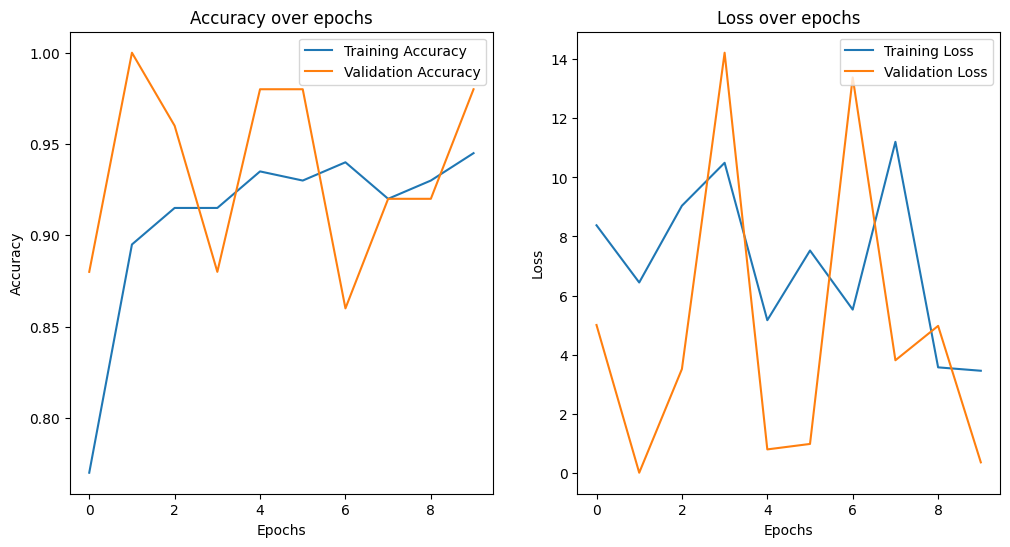

In [26]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:
# Step 9: Prediction function
import numpy as np
from tensorflow.keras.preprocessing import image
def predict_pet(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred[0])
    confidence = pred[0][class_idx]
    return 'cat' if class_idx == 0 else 'dog', float(confidence)

1/1 [==============================] - 0s 417ms/step
Predicted: dog with 100.00% confidence


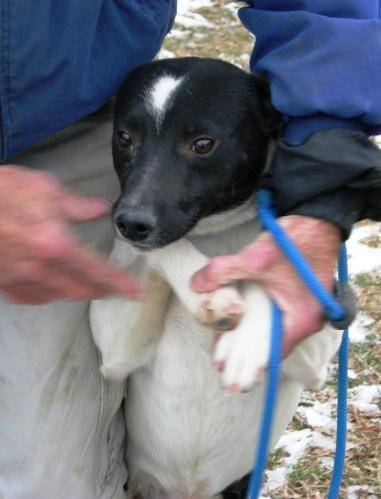

In [35]:
# Example usage

pred_class, confidence = predict_pet('/content/test_1/test_1/1.jpg')
print(f'Predicted: {pred_class} with {confidence:.2%} confidence')

from IPython.display import display
from PIL import Image
img = Image.open('/content/test_1/test_1/1.jpg')
display(img)